In [1]:
import sys
sys.path.append("..")
import mlflow
import pandas as pd
import tasks.analysis as analysis
import config.config as config
import tasks.datapipeline.process_data as process_data 

mlflow.set_tracking_uri('../mlruns')

In [15]:
# temp code
conf = config.read_config('../config/gemini.cfg')
data, _ = process_data.pipeline(conf)
all_diagnosis = data['mr_diagnosis'].unique()
display(all_diagnosis)
count_d = 0
count_p = 0
for d in all_diagnosis:
    if not isinstance(d, str):
        continue
    if d[0]=='h' or d[0]=='H':
        count_d+=1
    if d[0]=='u' or d[0]=='U':
        count_p+=1
print(count_d, count_p)

{'config_file': None, 'extract': False, 'train': False, 'predict': False, 'analyze': False, 'user': 'koshkinam', 'password': 'Masha1978', 'port': 5432, 'host': 'db.gemini-hpc.ca', 'database': 'delirium_v3_0_0', 'w': False, 'r': False, 'input': '/mnt/nfs/project/delirium/data/all_before_2018.csv', 'output_folder': '/mnt/nfs/project/delirium/data', 'output_full_path': None, 'stats_path': '/mnt/nfs/project/delirium/data/all_before_2018_stats.pkl', 'features': ['sex', 'age', 'mort_hosp', 'readmission_7', 'readmission_28', 'palliative', 'los_er', 'icd10_A00_B99', 'icd10_C00_D49', 'icd10_D50_D89', 'icd10_E00_E89', 'icd10_F01_F99', 'icd10_G00_G99', 'icd10_H00_H59', 'icd10_H60_H95', 'icd10_I00_I99', 'icd10_J00_J99', 'icd10_K00_K95', 'icd10_L00_L99', 'icd10_M00_M99', 'icd10_N00_N99', 'icd10_O00_O99', 'icd10_Q00_Q99', 'icd10_R00_R99', 'icd10_S00_T88', 'icd10_U07_U08', 'icd10_Z00_Z99', 'icd10_nan'], 'target': 'los', 'pop_size': 10000, 'filter_year': None, 'filter_date_from': '', 'filter_date_to':

array(['C259', 'J4590', 'J189', ..., 'M0287', 'G82091', 'M6259'],
      dtype=object)

114 0


In [21]:
#add noise to lor_er and age (for demo purposes)

import tasks.datapipeline.process_data as process_data 
import numpy as np 

conf = None
conf = config.read_config('../config/gemini.cfg')
data, _ = process_data.pipeline(conf)

print(data['age'].head)

mu, sigma = 5, 3 
# creating a noise with the same dimension as the dataset  
noise = np.random.normal(mu, sigma, len(data['age'])).astype(int) 
print(noise)

data['age'] = data['age'].add(noise)
print(data['age'].head)

#repeat for los_er
mu, sigma = 5, 5 
# creating a noise with the same dimension as the dataset  
noise = np.random.normal(mu, sigma, len(data['los_er'])).astype(int) 
print(noise)

data['los_er'] = data['los_er'].add(noise)
data.to_csv('/mnt/nfs/project/delirium/data/all_before_2018_with_noise.csv')

conf.input = '/mnt/nfs/project/delirium/data/all_before_2018_with_noise.csv'
data, _ = process_data.pipeline(conf)
print(data['age'].head)

{'config_file': None, 'extract': False, 'train': False, 'predict': False, 'analyze': False, 'user': 'koshkinam', 'password': 'Masha1978', 'port': 5432, 'host': 'db.gemini-hpc.ca', 'database': 'delirium_v3_0_0', 'w': False, 'r': False, 'input': '/mnt/nfs/project/delirium/data/all_before_2018.csv', 'output_folder': '/mnt/nfs/project/delirium/data', 'output_full_path': None, 'stats_path': '/mnt/nfs/project/delirium/data/all_before_2018_stats.pkl', 'features': ['sex', 'age', 'mort_hosp', 'readmission_7', 'readmission_28', 'palliative', 'los_er', 'icd10_A00_B99', 'icd10_C00_D49', 'icd10_D50_D89', 'icd10_E00_E89', 'icd10_F01_F99', 'icd10_G00_G99', 'icd10_H00_H59', 'icd10_H60_H95', 'icd10_I00_I99', 'icd10_J00_J99', 'icd10_K00_K95', 'icd10_L00_L99', 'icd10_M00_M99', 'icd10_N00_N99', 'icd10_O00_O99', 'icd10_Q00_Q99', 'icd10_R00_R99', 'icd10_S00_T88', 'icd10_U07_U08', 'icd10_Z00_Z99', 'icd10_nan'], 'target': 'los', 'pop_size': 10000, 'filter_year': None, 'filter_date_from': '', 'filter_date_to':

# Dataset Drift Report (by year)

In [22]:
#read analysis configuration
conf = None
conf = config.read_config('../config/gemini.cfg')

# run dataset drift analysis and generate html report: compare two years 2016 and 2017
conf.html = True
conf.slice = 'year'
conf.data_ref = [2016]
conf.data_eval = [2017]
conf.input = '/mnt/nfs/project/delirium/data/all_before_2018_with_noise.csv'

conf.report_full_path = '../../dataset_2016_2017.html'


{'config_file': None, 'extract': False, 'train': False, 'predict': False, 'analyze': False, 'user': 'koshkinam', 'password': 'Masha1978', 'port': 5432, 'host': 'db.gemini-hpc.ca', 'database': 'delirium_v3_0_0', 'w': False, 'r': False, 'input': '/mnt/nfs/project/delirium/data/all_before_2018.csv', 'output_folder': '/mnt/nfs/project/delirium/data', 'output_full_path': None, 'stats_path': '/mnt/nfs/project/delirium/data/all_before_2018_stats.pkl', 'features': ['sex', 'age', 'mort_hosp', 'readmission_7', 'readmission_28', 'palliative', 'los_er', 'icd10_A00_B99', 'icd10_C00_D49', 'icd10_D50_D89', 'icd10_E00_E89', 'icd10_F01_F99', 'icd10_G00_G99', 'icd10_H00_H59', 'icd10_H60_H95', 'icd10_I00_I99', 'icd10_J00_J99', 'icd10_K00_K95', 'icd10_L00_L99', 'icd10_M00_M99', 'icd10_N00_N99', 'icd10_O00_O99', 'icd10_Q00_Q99', 'icd10_R00_R99', 'icd10_S00_T88', 'icd10_U07_U08', 'icd10_Z00_Z99', 'icd10_nan'], 'target': 'los', 'pop_size': 10000, 'filter_year': None, 'filter_date_from': '', 'filter_date_to':

In [23]:
response = analysis.main(conf)
print(response)

../../dataset_2016_2017.html


# Dataset Drift Report (by hospital)

In [24]:
# Compare data from two hospitals (St Michael's as reference, Mount Sinai as evaluated)
conf.slice = 'hospital_id'
conf.data_ref = [3]
conf.data_eval = [7]
conf.report_full_path = '../../dataset_hospitals.html'
response = analysis.main(conf)
print(response)

../../dataset_hospitals.html


# Model Performance Comparison Report

In [5]:
# run analysis and generate html report (this time model performance comparison)
# looks at the prediction of the model trained on all data before 2018. Compares 2017(val) and 2018 (test).
conf.type = 'performance'
conf.reference= '../../results_2017.csv' 
conf.test = '../../results_2018.csv'
conf.report_full_path = '../../dataset_performance_comparison.html'
name = analysis.main(conf)
print(name)

../../dataset_performance_comparison.html


# System Monitoring with MLFlow

In [6]:
#MLFlow history for analysis
# Display dataset drift analysis runs

import os
import json
import mlflow
import pandas as pd


def get_dataset_metrics_list(data):
     if ('metrics' in data.keys()) and data['metrics']:
        metrics = data['metrics']
        #timestamp = data['params']['timestamp']
        drift = 'No' if metrics['dataset_drift']==0 else 'Yes'
        return [drift, metrics['n_features'], metrics['n_drifted_features']]
     else:
        return ['-', '-', '-']

# List all existing experiments
all_experiments = mlflow.list_experiments()
exp_data = []
for exp in all_experiments:
    row = [exp.name, exp.artifact_location, exp.lifecycle_stage]
    exp_data.append(row)
exp_frame = pd.DataFrame(exp_data, columns = ['Name', 'Artifacts', 'Status'])
display(exp_frame)
    
exp = mlflow.get_experiment_by_name('DatasetAnalysis')
runs = mlflow.list_run_infos(exp.experiment_id, max_results=5)
table = []
for r in runs:
    exp_run = mlflow.get_run(r.run_id).to_dictionary()
    path = exp_run['info']['artifact_uri'][6:]
    config_file = os.path.join(path, 'config.json')
    if not os.path.isfile(config_file):
        continue
    with open(config_file) as f:
        data = json.load(f)
        row = [data['input'], data['slice'], data['data_ref'], data['data_eval']]
        row = row + get_dataset_metrics_list(exp_run['data'])
        table.append(row)
frame = pd.DataFrame(table, columns=['Input', 'Slice', 'Ref Slice', 'Eval Slice', 'Drift', 'Feat', 'Drift_Feat'])
print('------------------- Dataset Analysis ----------------------')
display(frame)

,Name,Artifacts,Status
0,DatasetAnalysis,file:///mnt/nfs/home/koshkinam/vector-delirium...,active
1,Default,file:///mnt/nfs/home/koshkinam/vector-delirium...,active
2,ModelComparison,file:///mnt/nfs/home/koshkinam/vector-delirium...,active
3,Prediction,file:///mnt/nfs/home/koshkinam/vector-delirium...,active


------------------- Dataset Analysis ----------------------


,Input,Slice,Ref Slice,Eval Slice,Drift,Feat,Drift_Feat
0,/mnt/nfs/project/delirium/data/all_before_2018...,hospital_id,[3],[7],Yes,28.0,23.0
1,/mnt/nfs/project/delirium/data/all_before_2018...,year,[2016],[2017],No,28.0,7.0
2,/mnt/nfs/project/delirium/data/all_before_2018...,year,[2016],[2017],No,28.0,7.0
3,/mnt/nfs/project/delirium/data/all_before_2018...,hospital_id,[3],[7],Yes,28.0,23.0
4,/mnt/nfs/project/delirium/data/all_before_2018...,year,[2016],[2017],No,28.0,7.0


In [7]:
# get all the executions folders
executions_folder = '../../executions'
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(executions_folder)]
files.sort()

# Continuous Pipeline Simulation and Analysis

                  Dataset Analysis Results: number of drifted features  


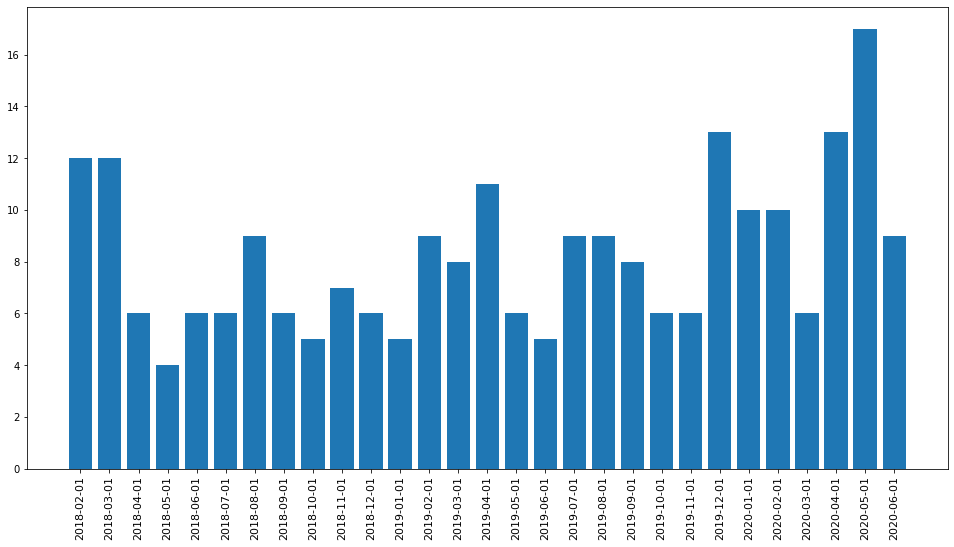

In [8]:
#plot how dataset drift changes over time compared to the reference data

table = []
y = []
for dir_run in files:
    with open(os.path.join(executions_folder, dir_run, 'dataset_report.json')) as f:
        data = json.load(f)
        results = data['data_drift']['data']['metrics']
    
        feat = results['n_features']
        drift = 'Yes' if results['dataset_drift'] else 'No'
        feat_drift = results['n_drifted_features']
        
        y.append(feat_drift)
        row = [dir_run, drift, str(feat_drift)+'/'+str(feat)]
        table.append(row)
    
frame = pd.DataFrame(table, columns=['Period', 'Drift Detected', 'Drifted Features / All Features'])
print('                  Dataset Analysis Results: number of drifted features  ')
#print(frame)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(16.5, 8.5)
x = frame['Period'].values
ax.bar(x,y)
ax.xaxis.set_ticks(frame['Period'].values)
ax.set_xticklabels(frame['Period'].values, rotation='vertical', fontsize=11)
plt.show()

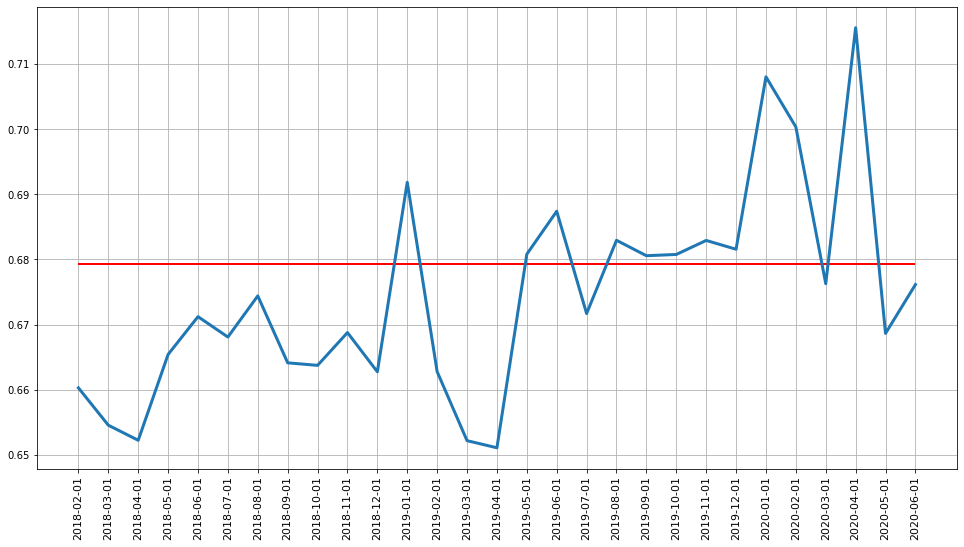

In [9]:
y = []
for dir_run in files:
    with open(os.path.join(executions_folder, dir_run, 'model_report.json')) as f:
        data = json.load(f)
        results = data['classification_performance']['data']['metrics']
        baseline = results['reference']['accuracy']
        y.append(results['current']['accuracy'])
    

fig = plt.figure()
fig.set_size_inches(16.5, 8.5)
ax = plt.axes()

plt.plot(x, y, '-', linewidth=3)
ax.hlines(y=baseline, xmin = 0, xmax = max(x), linewidth=2, color='r')

# Set ticks labels for x-axis
ax.xaxis.set_ticks(frame['Period'].values)
ax.set_xticklabels(frame['Period'].values, rotation='vertical', fontsize=11)

plt.grid()
plt.show()